In [3]:
from module import *
import pandas as pd
import numpy as np
from IPython.display import Latex, display_latex

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
PRECISION = 3
np.set_printoptions(precision=PRECISION, suppress=True)
pd.options.display.float_format = "{:.3f}".format

# Introducción de datos

$$ \bar{P1ia} - \bar{P1ib} = R_A \tan{\frac{\alpha}{2}} + R_B \tan{\frac{\beta}{2}} $$
$$ \bar{P1ib} - \bar{P1ic} = R_B \tan{\frac{\beta}{2}} + R_C \tan{\frac{\theta}{2}} $$

In [6]:
# R -> Radios
# < -> Angulos en º
data = np.array(
    [
        # R           # <
        (100, np.deg2rad(30)),
        ( 90, np.deg2rad(40)),
        (110, np.deg2rad(20)),
    ],
)
_ = pd.DataFrame(data, columns=['radios', 'angulos'])
__ = _.apply({'radios': lambda x: x, 'angulos': np.rad2deg})
radios = _['radios']
__

,radios,angulos
0,100.000,30.000
1,90.000,40.000
2,110.000,20.000


# Cálculo de subtangentes

In [7]:
subtangentes = st_vec(data)
for idx, row in __.iterrows():
    A = np.float32(row['angulos'])
    R = np.float32(row['radios'])
    string = f'$ {R} \\times \\tan{A / 2}º \\qquad = {round(subtangentes[idx], PRECISION)} $'
    display_latex(Latex(string))
    
_['subtangentes'] = subtangentes
angulos = copy.deepcopy(_['angulos'])
_

,radios,angulos,subtangentes
0,100.000,0.524,26.795
1,90.000,0.698,32.757
2,110.000,0.349,19.396


# Cálculo de diagonales y de cotas progresivas

In [8]:
# Calculo de diagonales
diag_vec(data[::-1], st_=True)

array([[20.597,  1.047],
       [69.411,  1.571]])

In [12]:
# Calculo de cotas
# cotas = p_total(data, pi=0)
# print(cotas)
# cotas = cotas + np.abs(np.min(cotas))
# cotas += radios[0] * angulos[0] / 2
# pd.DataFrame(cotas.reshape(-1,1), columns=['cotas progresivas'])
cotas = p_total(data, pi=14_000)
cotas

array([13903.794, 13956.154, 14018.986, 14057.383])

# Elementos iniciales de cuadro de replanteo

In [13]:
expanded = expand__(data, pi=14_000, prec=10)
_ = pd.DataFrame(expanded, columns=['radio', 'angulo', 'cota', 'D'])
radio_pre0 = _['radio']
radio_pre0 = list(pd.concat([pd.Series([0]), radio_pre0[:-1]]))
radio_pre0 = np.array(radio_pre0)
_['radio_pre0'] = radio_pre0
# _['gamma'] = gamma_vec(expanded[:,1:3])
# _ = _.apply({'radio': lambda x: x, 'angulo': np.rad2deg, 'cota': lambda x: x, 'D': lambda x: x})
_

,radio,angulo,cota,D,radio_pre0
0,100.000,0.524,13903.794,0.000,0.000
1,100.000,0.524,13910.000,6.206,100.000
2,100.000,0.524,13920.000,10.000,100.000
3,100.000,0.524,13930.000,10.000,100.000
4,100.000,0.524,13940.000,10.000,100.000
5,100.000,0.524,13950.000,10.000,100.000
6,90.000,0.698,13956.154,6.154,100.000
7,90.000,0.698,13960.000,3.846,90.000
8,90.000,0.698,13970.000,10.000,90.000
9,90.000,0.698,13980.000,10.000,90.000


## Cálculo de $\gamma$

$$ \frac{angulo * distancia}{ 2 * r * angulo} $$

In [14]:
_['gamma'] = _['D'] / (2 * _['radio'])
_

,radio,angulo,cota,D,radio_pre0,gamma
0,100.000,0.524,13903.794,0.000,0.000,0.000
1,100.000,0.524,13910.000,6.206,100.000,0.031
2,100.000,0.524,13920.000,10.000,100.000,0.050
3,100.000,0.524,13930.000,10.000,100.000,0.050
4,100.000,0.524,13940.000,10.000,100.000,0.050
5,100.000,0.524,13950.000,10.000,100.000,0.050
6,90.000,0.698,13956.154,6.154,100.000,0.034
7,90.000,0.698,13960.000,3.846,90.000,0.021
8,90.000,0.698,13970.000,10.000,90.000,0.056
9,90.000,0.698,13980.000,10.000,90.000,0.056


## Cálculo de $D$ acumulado

In [15]:
_['D_sum'] = np.add.accumulate(_['D'])
_

,radio,angulo,cota,D,radio_pre0,gamma,D_sum
0,100.000,0.524,13903.794,0.000,0.000,0.000,0.000
1,100.000,0.524,13910.000,6.206,100.000,0.031,6.206
2,100.000,0.524,13920.000,10.000,100.000,0.050,16.206
3,100.000,0.524,13930.000,10.000,100.000,0.050,26.206
4,100.000,0.524,13940.000,10.000,100.000,0.050,36.206
5,100.000,0.524,13950.000,10.000,100.000,0.050,46.206
6,90.000,0.698,13956.154,6.154,100.000,0.034,52.360
7,90.000,0.698,13960.000,3.846,90.000,0.021,56.206
8,90.000,0.698,13970.000,10.000,90.000,0.056,66.206
9,90.000,0.698,13980.000,10.000,90.000,0.056,76.206


## Cálculo de $\gamma$ acumulado

In [17]:
_['gamma_sum'] = np.add.accumulate(_['gamma'])
_.apply({'gamma_sum': np.rad2deg})

,gamma_sum
0,0.000
1,1.778
2,4.643
3,7.508
4,10.372
5,13.237
6,15.196
7,16.420
8,19.603
9,22.786


In [1]:
_['aux'] = np.arcsin(_['lc - D_sum'] / (2 * _['radio_pre']))

NameError: name 'np' is not defined

In [610]:
radio_pre0 / 2

array([  0.   ,  97.227,  97.227,  97.227,  97.227,  97.227,  97.227,
        97.227,  97.227,  97.227,  97.227,  97.227,  97.227,  97.227,
        97.227,  97.227,  97.227,  97.227,  97.227,  97.227, 120.328,
       120.328, 120.328, 120.328, 120.328, 120.328, 120.328, 120.328,
       120.328, 120.328, 120.328, 120.328, 120.328, 120.328, 120.328,
       120.328, 120.328, 120.328, 120.328, 120.328, 120.328, 120.328,
       120.328, 120.328, 120.328, 120.328, 120.328, 120.328, 120.328,
       120.328, 120.328,  64.249,  64.249,  64.249,  64.249,  64.249,
        64.249,  64.249,  64.249,  64.249,  64.249,  64.249])

## Cálculo de $lc$

In [ ]:
def lc_calc(dataframe):
    

In [18]:
# Gamma_sum se encuentra en radianes
_['lc'] = ( np.sin(_['gamma_sum']) * radio_pre0 * 2 )
_['lc - D_sum'] = _['lc'] - _['D_sum']
_

c:\Users\Cesar\.conda\envs\ds\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)


,radio,angulo,cota,D,radio_pre0,gamma,D_sum,gamma_sum,lc,lc - D_sum
0,100.000,0.524,13903.794,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,100.000,0.524,13910.000,6.206,100.000,0.031,6.206,0.031,6.205,-0.001
2,100.000,0.524,13920.000,10.000,100.000,0.050,16.206,0.081,16.188,-0.018
3,100.000,0.524,13930.000,10.000,100.000,0.050,26.206,0.131,26.131,-0.075
4,100.000,0.524,13940.000,10.000,100.000,0.050,36.206,0.181,36.009,-0.197
5,100.000,0.524,13950.000,10.000,100.000,0.050,46.206,0.231,45.796,-0.410
6,90.000,0.698,13956.154,6.154,100.000,0.034,52.360,0.265,52.424,0.064
7,90.000,0.698,13960.000,3.846,90.000,0.021,56.206,0.287,50.882,-5.324
8,90.000,0.698,13970.000,10.000,90.000,0.056,66.206,0.342,60.391,-5.815
9,90.000,0.698,13980.000,10.000,90.000,0.056,76.206,0.398,69.713,-6.493


### Cálculo de azimuts

Ya que utilizamos un sentido antihorario, tenemos que utilizar un azimut inverso al del útlimo punto y restando las diferencias generadas en lugar de sumarlas.
$$ \text{Azimut}_{\text{inverso}} = 180º - \text{Azimut} $$

In [19]:
az_init = np.pi - np.deg2rad(15)
_['azimut_inv'] = _['gamma_sum'] + az_init
_

,radio,angulo,cota,D,radio_pre0,gamma,D_sum,gamma_sum,lc,lc - D_sum,azimut_inv
0,100.000,0.524,13903.794,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.880
1,100.000,0.524,13910.000,6.206,100.000,0.031,6.206,0.031,6.205,-0.001,2.911
2,100.000,0.524,13920.000,10.000,100.000,0.050,16.206,0.081,16.188,-0.018,2.961
3,100.000,0.524,13930.000,10.000,100.000,0.050,26.206,0.131,26.131,-0.075,3.011
4,100.000,0.524,13940.000,10.000,100.000,0.050,36.206,0.181,36.009,-0.197,3.061
5,100.000,0.524,13950.000,10.000,100.000,0.050,46.206,0.231,45.796,-0.410,3.111
6,90.000,0.698,13956.154,6.154,100.000,0.034,52.360,0.265,52.424,0.064,3.145
7,90.000,0.698,13960.000,3.846,90.000,0.021,56.206,0.287,50.882,-5.324,3.166
8,90.000,0.698,13970.000,10.000,90.000,0.056,66.206,0.342,60.391,-5.815,3.222
9,90.000,0.698,13980.000,10.000,90.000,0.056,76.206,0.398,69.713,-6.493,3.277


## Cálculo de coordenadas

$$
N = N_{\text{anterior}} + L_c \times \cos(\text{Azimut}_\text{inverso}) \\
E = E_{\text{anterior}} - L_c \times \sin(\text{Azimut}_\text{inverso})
$$

In [20]:
N_init = 0
E_init = 0
_['delta_N'] = _[['azimut_inv', 'lc']].apply(lambda x: np.cos(x['azimut_inv']) * x['lc'], axis=1)
_['delta_E'] = _[['azimut_inv', 'lc']].apply(lambda x: -np.sin(x['azimut_inv']) * x['lc'], axis=1)
_['N'] = _['delta_N'] + N_init
_['E'] = _['delta_E'] + E_init
_

C:\Users\Cesar\AppData\Local\Temp\ipykernel_15828\892175802.py:3: RuntimeWarning: invalid value encountered in cos
  _['delta_N'] = _[['azimut_inv', 'lc']].apply(lambda x: np.cos(x['azimut_inv']) * x['lc'], axis=1)
C:\Users\Cesar\AppData\Local\Temp\ipykernel_15828\892175802.py:4: RuntimeWarning: invalid value encountered in sin
  _['delta_E'] = _[['azimut_inv', 'lc']].apply(lambda x: -np.sin(x['azimut_inv']) * x['lc'], axis=1)


,radio,angulo,cota,D,radio_pre0,gamma,D_sum,gamma_sum,lc,lc - D_sum,azimut_inv,delta_N,delta_E,N,E
0,100.000,0.524,13903.794,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.880,-0.000,-0.000,0.000,0.000
1,100.000,0.524,13910.000,6.206,100.000,0.031,6.206,0.031,6.205,-0.001,2.911,-6.041,-1.419,-6.041,-1.419
2,100.000,0.524,13920.000,10.000,100.000,0.050,16.206,0.081,16.188,-0.018,2.961,-15.925,-2.910,-15.925,-2.910
3,100.000,0.524,13930.000,10.000,100.000,0.050,26.206,0.131,26.131,-0.075,3.011,-25.908,-3.407,-25.908,-3.407
4,100.000,0.524,13940.000,10.000,100.000,0.050,36.206,0.181,36.009,-0.197,3.061,-35.891,-2.905,-35.891,-2.905
5,100.000,0.524,13950.000,10.000,100.000,0.050,46.206,0.231,45.796,-0.410,3.111,-45.775,-1.409,-45.775,-1.409
6,90.000,0.698,13956.154,6.154,100.000,0.034,52.360,0.265,52.424,0.064,3.145,-52.424,0.179,-52.424,0.179
7,90.000,0.698,13960.000,3.846,90.000,0.021,56.206,0.287,50.882,-5.324,3.166,-50.867,1.261,-50.867,1.261
8,90.000,0.698,13970.000,10.000,90.000,0.056,66.206,0.342,60.391,-5.815,3.222,-60.196,4.847,-60.196,4.847
9,90.000,0.698,13980.000,10.000,90.000,0.056,76.206,0.398,69.713,-6.493,3.277,-69.071,9.445,-69.071,9.445


In [614]:
np.max(abs(_['lc - D_sum']))

231.44709194191648

In [615]:
_.query('radio != radio_pre0')['lc - D_sum'].iloc[:]

0     0.000
19   -2.853
50   20.762
61      NaN
Name: lc - D_sum, dtype: float64

# Guardando resultados

In [616]:
# _.to_excel("test.xlsx", index=False)
np.add.accumulate(angulos / 2)[0]

0.4651714354268359

In [617]:
np.sin(angulos / 2) * radios * 2

0   174.456
1   280.541
2    92.233
dtype: float64

# Gráfica (no proporcional)

In [618]:
_.columns

Index(['radio', 'angulo', 'cota', 'D', 'radio_pre0', 'gamma', 'D_sum',
       'gamma_sum', 'lc', 'lc - D_sum', 'azimut_inv', 'delta_N', 'delta_E',
       'N', 'E'],
      dtype='object')

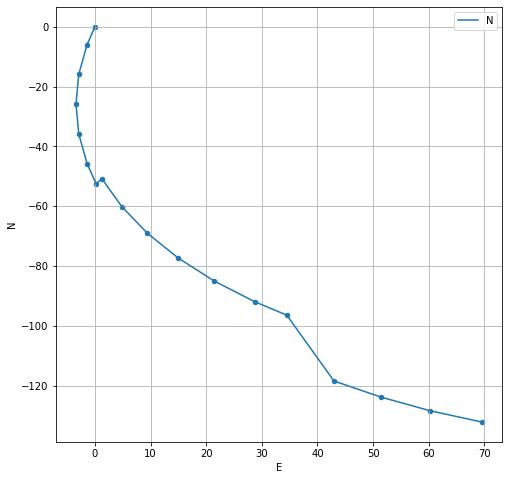

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8), )
_[['N', 'E']].plot(x='E', y='N', kind='scatter', ax=ax)
_[['N', 'E']].plot(x='E', y='N', ax=ax)
ax.grid()
plt.show()